# Assignment - Sentiment Analysis of Movie Reviews

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [ ]:
import os

In [ ]:
!pwd

/content


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

100% 1.90M/1.90M [00:01<00:00, 2.13MB/s]
100% 1.90M/1.90M [00:01<00:00, 1.88MB/s]


In [ ]:
!unzip sentiment-analysis-on-movie-reviews.zip -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [ ]:
train_fname = 'data/train.tsv.zip'
test_fname = 'data/test.tsv.zip'
sub_fname = 'data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_fname, sep = '\t')

In [ ]:
raw_df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [ ]:
raw_df.shape

(156060, 4)

In [ ]:
raw_df.Phrase.sample(10).values

array(['to provide an enjoyable 100 minutes in a movie theater',
       'the general absurdity of modern life', 'ever here',
       'like My Big Fat Greek Wedding', 'are provocative',
       'a bunch of strung-together TV episodes',
       'of serious subject matter and dark , funny humor',
       'faster paced family', 'inimitable', 'imaginatively mixed cast'],
      dtype=object)

In [ ]:
test_df = pd.read_csv(test_fname, sep = '\t')

In [ ]:
test_df.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


In [ ]:
test_df.shape

(66292, 3)

In [ ]:
sub_df = pd.read_csv(sub_fname)

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


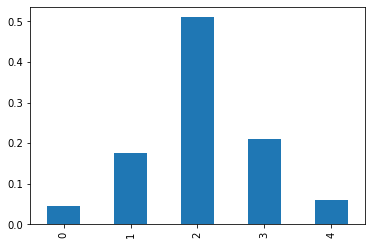

In [ ]:
raw_df.Sentiment.value_counts(normalize = True).sort_index().plot(kind='bar')

Summarize your insights and learnings from the dataset below:

* The phrases in the movie reviews are part of each whole reviews. Different entries (rows) in the train_df may come from the same review. There are duplications in different entries 
* Distributions in the sentiment scores are not evenly distributed. About half of the scores are neutral scores which provide not much information.

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [ ]:
import nltk 
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stemmer = SnowballStemmer(language = 'english')

In [ ]:
def tokenize(text):
  return[stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()]

In [ ]:
tokenize("loneliness and is n't afraid to provoke introspection in both its characters and its audience .")

['loneli',
 'and',
 'is',
 'afraid',
 'to',
 'provok',
 'introspect',
 'in',
 'both',
 'it',
 'charact',
 'and',
 'it',
 'audienc']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
english_stopwords = stopwords.words('english')

In [ ]:
", ".join(english_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
selected_stopwords = english_stopwords[:115]

In [ ]:
", ".join(selected_stopwords)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some"

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, stop_words = selected_stopwords, ngram_range = (1,2), max_features = 2000)

In [ ]:
vectorizer.fit(raw_df.Phrase)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'ani', 'becaus', 'befor', 'doe', 'dure', 'onc', 'ourselv', 'themselv', 'whi', 'yourselv'] not in stop_words.
  % sorted(inconsistent)


TfidfVectorizer(max_features=2000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7f291f1369e0>)

In [ ]:
len(vectorizer.vocabulary_)

2000

In [ ]:
vectorizer.get_feature_names_out()[:200]

array(['abandon', 'abil', 'abl', 'abov', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'ani',
       'anim', 'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth',
       'apart', 'appar', 'appeal', 'appear', 'appli', 'appreci',
       'approach', 'appropri', 'area', 'argu', 'argument', 'around',
       'arriv', 'art'

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
inputs = vectorizer.transform(raw_df.Phrase)

In [ ]:
inputs.shape

(156060, 2000)

In [ ]:
inputs.toarray()[0][:200]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27620188,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33022325, 0.29314979, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
test_inputs = vectorizer.transform(test_df.Phrase)

In [ ]:
test_inputs.shape

(66292, 2000)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [ ]:
inputs

<156060x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 473102 stored elements in Compressed Sparse Row format>

In [ ]:
TRAIN_SIZE = 110_000

In [ ]:
TRAIN_SIZE

110000

In [ ]:
train_inputs = inputs[:TRAIN_SIZE]

In [ ]:
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [ ]:
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [ ]:
val_inputs = inputs[TRAIN_SIZE:]

In [ ]:
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

In [ ]:
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

### Train Logistic Regression Model



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(train_inputs, train_targets)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
train_preds = model.predict(train_inputs)

In [ ]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [ ]:
train_preds

array([3, 2, 2, ..., 0, 0, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.6381818181818182

In [ ]:
val_preds = model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets, val_preds)

0.5795049934867564

### Study Predictions on Sample Inputs

In [ ]:
small_df = raw_df.sample(20)

In [ ]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
32782,32783,1536,on the way to striking a blow for artistic int...,2
122280,122281,6554,'d want something a bit more complex than We W...,2
7076,7077,285,as the original,3
148634,148635,8087,"compared to the usual , more somber festival e...",3
28659,28660,1326,", but solidly entertaining",4
67536,67537,3429,"a dashing and resourceful hero ; a lisping , r...",4
22366,22367,1008,the director was trying to do than of what he ...,2
142757,142758,7748,I ca n't remember the last time I saw an audie...,1
35055,35056,1648,Gallic,2
128688,128689,6921,for the National Basketball Association,2


In [ ]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [ ]:
small_inputs.shape

(20, 2000)

In [ ]:
small_preds = model.predict(small_inputs)

In [ ]:
small_preds

array([2, 2, 2, 3, 3, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3])

### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score 



In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [ ]:
test_inputs = vectorizer.transform(test_df.Phrase)
test_preds = model.predict(test_inputs)

In [ ]:
sub_df.Sentiment = test_preds

In [ ]:
sub_df

,PhraseId,Sentiment
0,156061,3
1,156062,3
2,156063,2
3,156064,3
4,156065,2
...,...,...
66287,222348,1
66288,222349,1
66289,222350,2
66290,222351,2


In [ ]:
sub_df.to_csv("submission.csv", index = None)

In [ ]:
!head submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,2
156066,3
156067,3
156068,2
156069,3


## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional: 
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips: 

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]`
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


### Model 1 Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model1 = MultinomialNB(class_prior = (0.05, 0.2, 0.5, 0.2, 0.05))

In [ ]:
model1.fit(train_inputs, train_targets)

MultinomialNB(class_prior=(0.05, 0.2, 0.5, 0.2, 0.05))

In [ ]:
accuracy_score(train_targets, model1.predict(train_inputs))

0.5881636363636363

In [ ]:
accuracy_score(val_targets, model1.predict(val_inputs))

0.5453755970473295

### Model 2 XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_classifier = xgb.XGBClassifier()

In [ ]:
xgb_classifier.fit(train_inputs, train_targets)

XGBClassifier(objective='multi:softprob')

In [ ]:
accuracy_score(train_targets, xgb_classifier.predict(train_inputs))

0.5425545454545454

In [ ]:
accuracy_score(val_targets, xgb_classifier.predict(val_inputs))

0.5094659140251846

### Model 3 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model3 = RandomForestClassifier(max_depth=50)

In [ ]:
model3.fit(train_inputs, train_targets)

RandomForestClassifier(max_depth=50)

In [ ]:
accuracy_score(train_targets, model3.predict(train_inputs))

0.6164818181818181

In [ ]:
accuracy_score(val_targets, model3.predict(val_inputs))

0.5224706904038211

Best Model:

Logistic Regression

(include Kaggle score screenshot)

## Submission and Future Work


How to make a submission:

- Add documentation and explanations
- Clean up any stray code/comments
- Include a screenshot of your best score
- Make a submission on the assignment page
- Review evaluation criteria carefully


Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
